<a href="https://colab.research.google.com/github/Rabia-creator/RabiaSaqib_DL_assignments_Q2_batch35/blob/main/carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pathlib
import tensorflow as tf
import tensorboard
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("CarPrice_Assignment.csv")



Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.head(6)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
plt.figure(figsize=(20,8))

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [ ]:
df=df.sample(frac=1)##shuffle data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
101,102,0,nissan dayz,gas,std,four,sedan,fwd,front,100.4,181.7,66.5,55.1,3095,ohcv,six,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,183.1,66.9,55.1,2563,ohc,four,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290.0
91,92,1,nissan rogue,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649.0


In [ ]:
#######          converting alphabetical feature in to numerical feature
import sklearn
LabelEncoder=sklearn.preprocessing.LabelEncoder()
df['fueltype']=LabelEncoder.fit_transform(df['fueltype'])
df['aspiration']=LabelEncoder.fit_transform(df['aspiration'])
df['carbody']=LabelEncoder.fit_transform(df['carbody'])
df['drivewheel']=LabelEncoder.fit_transform(df['carbody'])
df['enginelocation']=LabelEncoder.fit_transform(df['enginelocation'])
df['fuelsystem']=LabelEncoder.fit_transform(df['fuelsystem'])
df['doornumber']=LabelEncoder.fit_transform(df['doornumber'])
df['enginetype']=LabelEncoder.fit_transform(df['enginetype'])
df['cylindernumber']=LabelEncoder.fit_transform(df['cylindernumber'])

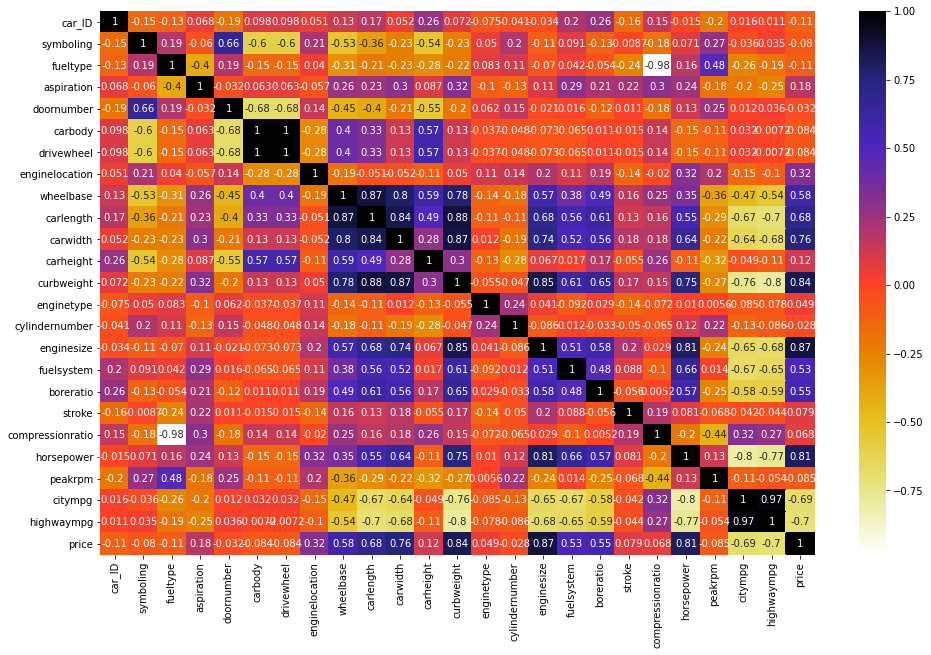

In [ ]:
### making a heat map of correlations
correlations=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot=True)
plt.show()

In [ ]:
#########          splitting the dataset in to training and testing
train_data=df.iloc[:144,:]
train_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
203,204,-1,volvo 246,0,1,0,3,3,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0
101,102,0,nissan dayz,1,0,0,3,3,0,100.4,181.7,66.5,55.1,3095,5,3,181,5,3.43,3.27,9.0,152,5200,17,22,13499.0
17,18,0,bmw x3,1,0,0,3,3,0,110.0,197.0,70.9,56.3,3505,3,3,209,5,3.62,3.39,8.0,182,5400,15,20,36880.0
193,194,0,volkswagen dasher,1,0,0,4,4,0,100.4,183.1,66.9,55.1,2563,3,2,109,5,3.19,3.40,9.0,88,5500,25,31,12290.0
91,92,1,nissan rogue,1,0,1,3,3,0,94.5,165.3,63.8,54.5,1918,3,2,97,1,3.15,3.29,9.4,69,5200,31,37,6649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,52,1,maxda glc deluxe,1,0,1,2,2,0,93.1,159.1,64.2,54.1,1900,3,2,91,1,3.03,3.15,9.0,68,5000,31,38,6095.0
19,20,1,chevrolet monte carlo,1,0,1,2,2,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.11,9.6,70,5400,38,43,6295.0
120,121,1,plymouth fury iii,1,0,0,2,2,0,93.7,157.3,63.8,50.6,1967,3,2,90,1,2.97,3.23,9.4,68,5500,31,38,6229.0
144,145,0,subaru r1,1,0,0,3,3,0,97.0,172.0,65.4,54.3,2385,4,2,108,1,3.62,2.64,9.0,82,4800,24,25,9233.0


In [ ]:
test_data=df.iloc[145:,:]
test_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
167,168,2,toyota corona liftback,1,0,1,1,1,0,98.4,176.2,65.6,52.0,2540,3,2,146,5,3.62,3.50,9.3,116,4800,24,30,8449.0
43,44,0,isuzu MU-X,1,0,0,3,3,0,94.3,170.7,61.8,53.5,2337,3,2,111,1,3.31,3.23,8.5,78,4800,24,29,6785.0
63,64,0,mazda glc deluxe,0,0,0,3,3,0,98.8,177.8,66.5,55.5,2443,3,2,122,3,3.39,3.39,22.7,64,4650,36,42,10795.0
11,12,0,bmw 320i,1,0,0,3,3,0,101.2,176.8,64.8,54.3,2395,3,2,108,5,3.50,2.80,8.8,101,5800,23,29,16925.0
5,6,2,audi fox,1,0,1,3,3,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,15250.0


In [ ]:
######## separating labels from train and test data

copy_of_train_data=train_data.copy()
copy_of_test_data=test_data.copy()
train_labels=train_data.pop('price')
test_labels=test_data.pop('price')### labels banane klyye khud mehnat karna ha

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,144.0,106.222222,60.961348,2.00,53.500,104.50,160.250,205.00
symboling,144.0,0.791667,1.289414,-2.00,0.000,1.00,2.000,3.00
fueltype,144.0,0.916667,0.277350,0.00,1.000,1.00,1.000,1.00
aspiration,144.0,0.159722,0.367627,0.00,0.000,0.00,0.000,1.00
doornumber,144.0,0.402778,0.492169,0.00,0.000,0.00,1.000,1.00
carbody,144.0,2.673611,0.800610,0.00,2.000,3.00,3.000,4.00
drivewheel,144.0,2.673611,0.800610,0.00,2.000,3.00,3.000,4.00
enginelocation,144.0,0.006944,0.083333,0.00,0.000,0.00,0.000,1.00
wheelbase,144.0,98.700000,5.908001,86.60,94.500,96.95,102.100,120.90
carlength,144.0,174.295139,12.166642,141.10,166.675,173.10,183.500,208.10


In [ ]:
###  normalizing the data

train_mean=np.mean(train_data,axis=0)
## standard deviation

train_std=np.std(train_data, axis=0)

### formula used (data - mean)/standard deviation

train_data=(train_data-train_mean)/train_std
test_data=(test_data-train_mean)/train_std        ### y its test-train/train 

In [ ]:
### check normalize test data

train_data.head()

,CarName,aspiration,boreratio,car_ID,carbody,carheight,carlength,carwidth,citympg,compressionratio,curbweight,cylindernumber,doornumber,drivewheel,enginelocation,enginesize,enginetype,fuelsystem,fueltype,highwaympg,horsepower,peakrpm,stroke,symboling,wheelbase
203,NaN,2.293659,-1.126402,1.609529,0.409098,0.727901,1.196344,1.304441,0.101743,3.464143,1.262819,1.039108,-0.821230,0.409098,-0.083624,0.439065,-0.096343,-0.115040,-3.316625,-0.539742,0.042897,-0.811207,0.478938,-1.394371,1.766469
101,NaN,-0.435985,0.434661,-0.069502,0.409098,0.564951,0.610744,0.223350,-1.216845,-0.269105,1.029747,1.039108,-0.821230,0.409098,-0.083624,1.300576,1.885579,0.888944,0.301511,-1.229998,1.179494,0.117730,0.064913,-0.616117,0.288750
17,NaN,-0.435985,1.140856,-1.452234,0.409098,1.053802,1.872670,2.205349,-1.509865,-0.535766,1.813022,1.039108,-0.821230,0.409098,-0.083624,1.970640,-0.096343,0.888944,0.301511,-1.506101,1.920753,0.582198,0.447090,-0.616117,1.919336
193,NaN,-0.435985,-0.457375,1.444918,1.662505,0.564951,0.726215,0.403532,-0.044767,-0.269105,0.013400,-0.157944,-0.821230,1.662505,-0.083624,-0.422446,-0.096343,0.888944,0.301511,0.012463,-0.401858,0.814432,0.478938,-0.616117,0.288750
91,NaN,-0.435985,-0.606048,-0.234113,0.409098,0.320526,-0.741909,-0.992876,0.834292,-0.162441,-1.218826,-0.157944,1.217686,0.409098,-0.083624,-0.709617,-0.096343,-1.119024,0.301511,0.840770,-0.871322,0.117730,0.128609,0.162136,-0.713382


In [ ]:
len(train_data.keys())

25

In [ ]:
test_data.head()

,CarName,aspiration,boreratio,car_ID,carbody,carheight,carlength,carwidth,citympg,compressionratio,curbweight,cylindernumber,doornumber,drivewheel,enginelocation,enginesize,enginetype,fuelsystem,fueltype,highwaympg,horsepower,peakrpm,stroke,symboling,wheelbase
167,NaN,-0.435985,1.140856,1.016930,-2.097715,-0.697914,0.157111,-0.182059,-0.191277,-0.189107,-0.030540,-0.157944,1.217686,-2.097715,-0.083624,0.462996,-0.096343,0.888944,0.301511,-0.125588,0.289983,-0.811207,0.797419,0.940389,-0.050956
43,NaN,-0.435985,-0.011357,-1.024246,0.409098,-0.086850,-0.296523,-1.893785,-0.191277,-0.402435,-0.418357,-0.157944,-0.821230,0.409098,-0.083624,-0.374584,-0.096343,-1.119024,0.301511,-0.263639,-0.648945,-0.811207,-0.062480,-0.616117,-0.747352
63,NaN,-0.435985,0.285988,-0.695024,0.409098,0.727901,0.289077,0.223350,1.566841,3.384145,-0.215852,-0.157944,-0.821230,0.409098,-0.083624,-0.111345,-0.096343,-0.115040,-3.316625,1.531026,-0.994865,-1.159558,0.447090,-0.616117,0.016985
11,NaN,-0.435985,0.694838,-1.551001,0.409098,0.239050,0.206598,-0.542422,-0.337787,-0.322437,-0.307552,-0.157944,-0.821230,0.409098,-0.083624,-0.446377,-0.096343,0.888944,0.301511,-0.263639,-0.080646,1.511135,-1.431949,-0.616117,0.424632
5,NaN,-0.435985,-0.457375,-1.649767,0.409098,-0.249801,0.247837,0.133259,-0.923826,-0.402435,-0.093584,-1.354997,1.217686,0.409098,-0.083624,0.223687,-0.096343,0.888944,0.301511,-0.815844,0.141731,0.814432,0.478938,0.940389,0.186838


In [ ]:
### making base model

model=tf.keras.models.Sequential()
model.add(Dense(10, activation='relu' , input_shape=[len(train_data.keys())]))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu',))
model.add(Dropout(0.5))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(1,))
model.compile(optimizer='rmsprop',loss='mse',metrics= ['mse','mae'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                260       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 409
Trainable params: 409
Non-trainable params: 0
__________________________________________________________

In [ ]:
############# Training model on train_data
history=model.fit(train_data, train_labels, epochs=100, verbose=0, validation_split=0.2)

ValueError: ignored

In [ ]:
### feeding history in datframe

history_df=pd.DataFrame(history.history)
history_df['epochs']=history.epoch
history_df.tail()

NameError: ignored

In [ ]:
#########  plotting loss
def history_plot(history):
  # for mean absolute error
  plt.figure()
  plt.xlabel('epochs')
  plt.ylabel('mean absolute error (price)')
  plt.plot(history_df['epochs'],history_df['mae'],label="Training MAE")
  plt.plot(history_df['epochs'],history_df['val_mae'],label="validation MAE")
  ##for mean squared error
  plt.figure()
  plt.xlabel('epochs')
  plt.ylabel('mean square error (price)')
  plt.plot(hisory_df['epochs'], history_df['loss'],label='Training loss')
  plt.plot(history_df['epochs'], history_df['val_mse'],label='validation loss')
  plt.legend()
history_plot(history_df)  


In [ ]:
#making predictions on test data
predictions=model.predict(test_data).flatten())
predictions=predicions.flatten()

In [ ]:
test_score=model.evaluate(test_data,test_labels)

In [ ]:
print(f"Loss: {test_score[0]}")
print(f"Mean absolute error: {test_score[2]}")

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.displot((predictions - test_labels),bins=20)
fig.suptitle('Error terms', fontsize=20)#plot heading
plt.xlabel('Errors', fontsize = 18)

In [ ]:
### mAKING SECOND MODEL FOR TUNNING
from tensorflow.keras.models import Sequential
model2=Sequential()
model2.add(Dense(64,activation='relu',input_shape= [len(train_data.keys())]))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(64,actovation='relu'))
model2.add(Dense(1))
optimizer=tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer,loss='mse',metrics=['mse','mae'])
model2.summary()


In [ ]:
#training model
history_1=model2.fit(train_data,train_labels, epochs=1000, verbose=0,validation_split=0.2)

In [ ]:
### feeding history_1 in dataframe

history_1_df=pd.DataFrame(history_1.history)
history_1_df['epochs']=history_1.epoch
history_1_df.tail()

In [ ]:
## plotting loss

def history_plot(history):
  ## for mean absolute error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('mean absolute error (price)')
  plt.plot(history_1_df['epochs'],history_1_df['mae'],label="Training MAE"))
  plt.plot(history_1_df['epochs'],histort_1_df['val_mae'],label='validation MAE')
  plt.legend()

  ## for mean square error
  plt.figure()
  plt.xlabel('epochs')
  plt.ylabel('mean square error (price)')
  plt.plot(history_1_df['epochs'],history_1_df['loss'],history_1_df['Training loss'])
  plt.plot(history_1_df['epochs'],history_1_df['val_mse'],label='Validation loss')
  plt.legend()
history_plot(history_1_df)  

In [ ]:
predictions1=model2.predict(test_data)
predictions1= [predictions1.flatten()]

In [ ]:
test1_score=model.evaluate(test_data,test_labels))

In [ ]:
print(f"Loss: {test_score[0]}")
print(f"mean absolute error: {test1_score[2]}")

In [ ]:
# making price predictions on test data
fig=plt.figure(figsize=(10,10))
plt.scatter(test_labels,predictions1)
fig.suptitle('actual price vs predicted price' , fontsize=20)
plt.xlabel('Test' ,fontsize=18)
plt.ylabel('predict',fontsize=16)
lims=[0,100000]
pt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.displot((predictions1 - test_labels), bins=20)
fig.suptitle('Error Terms',fontsize=20)  #plot heading
plt.xlabel('Errors',fontsize=18)

In [ ]:
## overcoming overfitting
from tensorflow.keras.callbacks import EarlyStopping
overcome =EarlyStopping(monitor='val loss',patience=10)

In [ ]:
from tensorflow.keras.models import Sequrntial
model3=Sequential()
model3.add(Dense(128, activation='relu', input_shape=[len(train_data.keys())])
model3.add(Dropout(0.5))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
model.summary()

In [ ]:
history_2=model3.fit(train_data,train_labels,epochs =100, verbose=0, validato=ion_split=0.2)


In [ ]:
history_2_df=pd.DataFrame(history_2.history)
history_2_df['epochs']= history2.epochs
history_2_df.tail()

In [ ]:
## plotting validation loss after overcoming overfitting
## plotting loss
def history_plot(history):
  #for mean absolute error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean absolute error (concrete strength)')
  plt.plot(history_2_df['Epochs'],history_2_df['mae'],label='Training MAE')
  plt.legend()
  
  # for mean square error

  plt.figure()
  plt.xlabel('epochs')
  plt.ylabel('mean square error (concrete strength)')
  plt.plot(history_2_df['epochs'], history_2_df['loss'],label='Training loss')
  plt.plot(history_2_df['epochs'], history_2_df['val_mse'], label='validation loss')
  plt.legend()
  history_plot(history_2_df)

In [ ]:
predictions3=model3.predict(test_data)
predictions3=predictions3.flatten()


In [ ]:
test_score= model3.evaluate(test_data,test_labels)

In [ ]:
#making price predictions on test data

fig=plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions1)
plt.suptitle('actual price vs predicted price', fontsize=20)
plt.xlabel('Test',fontsize=18)
plt.ylabel('Predict',fontsize=16)
lims=[0,100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
print(f"Loss: {test_score[0]}")
print(f"Mean absolute error: {test_score[2]}")

In [ ]:
# save model
model2.save('carPricePredictionModel.h5 ')